In [1]:
import pandas as pd

In [2]:
df_feature_x = pd.read_csv("preprocess.csv", index_col=0)
df_feature_x.head()

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,MentalHealth_No,MentalHealth_Yes,YearsExp,YearsProExp,NumSkills
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7,4,4
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,12,5,12
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,15,6,7
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,9,6,13
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9,2,5


In [3]:
df_feature_y = pd.read_csv("label.csv", index_col=0)
df_feature_y.head()

,Employed
0,0.0
1,1.0
2,0.0
3,0.0
5,0.0


In [4]:
from sklearn.preprocessing import StandardScaler
import numpy as np

norm_scaler = StandardScaler()

years_exp = df_feature_x["YearsExp"].values.reshape(-1, 1)
years_pro_exp = df_feature_x["YearsProExp"].values.reshape(-1, 1)
num_skills = df_feature_x["NumSkills"].values.reshape(-1, 1)

data_to_normal = np.column_stack((years_exp, years_pro_exp, num_skills))

new_values = norm_scaler.fit_transform(data_to_normal)

df_feature_x["YearsExp"] = new_values[:, 0]
df_feature_x["YearsProExp"] = new_values[:, 1]
df_feature_x["NumSkills"] = new_values[:, 2]

df_feature_x.head()

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,MentalHealth_No,MentalHealth_Yes,YearsExp,YearsProExp,NumSkills
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.758018,-0.628905,-1.471693
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.109125,-0.464633,-0.161156
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.280211,-0.300361,-0.980242
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.498461,-0.300361,0.002662
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.498461,-0.957449,-1.307876


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

years_exp = df_feature_x["YearsExp"].values.reshape(-1, 1)
years_pro_exp = df_feature_x["YearsProExp"].values.reshape(-1, 1)
num_skills = df_feature_x["NumSkills"].values.reshape(-1, 1)

data_to_minmax = np.column_stack((years_exp, years_pro_exp, num_skills))

new_values = norm_scaler.fit_transform(data_to_normal)

df_feature_x["YearsExp"] = new_values[:, 0]
df_feature_x["YearsProExp"] = new_values[:, 1]
df_feature_x["NumSkills"] = new_values[:, 2]

df_feature_x.head()

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,MentalHealth_No,MentalHealth_Yes,YearsExp,YearsProExp,NumSkills
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.758018,-0.628905,-1.471693
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.109125,-0.464633,-0.161156
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.280211,-0.300361,-0.980242
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.498461,-0.300361,0.002662
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.498461,-0.957449,-1.307876


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(df_feature_x, df_feature_y, test_size=0.2, random_state=1)


print(f"Data before splitting: {len(df_feature_x)}")
print(f"Train data: {len(X_train)}")
print(f"Validation data: {len(X_valid)}")

Data before splitting: 66965
Train data: 53572
Validation data: 13393


In [7]:
EPOCH = 20
LEARNING_RATE = 1e-3

In [8]:
import tensorflow as tf
len_feature = len(df_feature_x.columns)

tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len_feature,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

history = model.fit(X_train, Y_train, epochs=EPOCH, validation_data=(X_valid, Y_valid))

2023-11-12 13:37:18.875533: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 13:37:18.875686: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 13:37:18.878032: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-12 13:37:19.095936: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-12 13:37:26.846511: I tensorflow/compiler/

Epoch 1/20


2023-11-12 13:37:28.156138: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f62b2885be0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-12 13:37:28.156213: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-11-12 13:37:28.164975: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-12 13:37:28.188188: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-12 13:37:28.265272: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1675/1675 [==============================] - 10s 5ms/step - loss: 0.4725 - accuracy: 0.7703 - val_loss: 0.4592 - val_accuracy: 0.7788
Epoch 2/20
1675/1675 [==============================] - 9s 6ms/step - loss: 0.4576 - accuracy: 0.7769 - val_loss: 0.4529 - val_accuracy: 0.7806
Epoch 3/20
1675/1675 [==============================] - 10s 6ms/step - loss: 0.4560 - accuracy: 0.7773 - val_loss: 0.4522 - val_accuracy: 0.7821
Epoch 4/20
1675/1675 [==============================] - 10s 6ms/step - loss: 0.4553 - accuracy: 0.7775 - val_loss: 0.4521 - val_accuracy: 0.7828
Epoch 5/20
1675/1675 [==============================] - 9s 6ms/step - loss: 0.4552 - accuracy: 0.7776 - val_loss: 0.4524 - val_accuracy: 0.7790
Epoch 6/20
1675/1675 [==============================] - 9s 5ms/step - loss: 0.4548 - accuracy: 0.7769 - val_loss: 0.4518 - val_accuracy: 0.7813
Epoch 7/20
1675/1675 [==============================] - 9s 6ms/step - loss: 0.4544 - accuracy: 0.7779 - val_loss: 0.4519 - val_accuracy: 0.7838


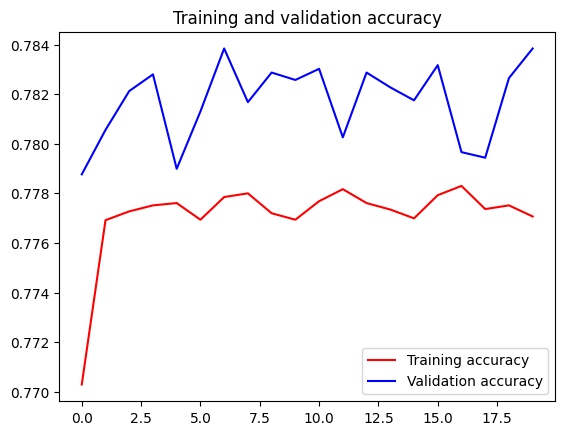

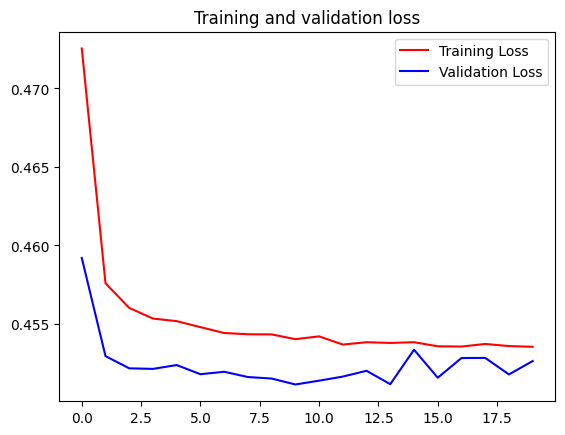

In [9]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
model.predict([[1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.72,-0.84,-0.925234]])

1/1 [==============================] - 0s 71ms/step


array([[0.89999795, 0.10000206]], dtype=float32)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                240       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 394 (1.54 KB)
Trainable params: 394 (1.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
'''saved_model = "mdl_std/model_with_std.h5"
model.save(saved_model)'''

'saved_model = "mdl_std/model_with_std.h5"\nmodel.save(saved_model)'

In [13]:
'''!tensorflowjs_converter --input_format=keras {saved_model} ./mdl_std'''

'!tensorflowjs_converter --input_format=keras {saved_model} ./mdl_std'

# Cari model TF.JS di folder mdl_std

In [14]:
import tempfile
import os
MODEL_DIR = tempfile.gettempdir()

print(MODEL_DIR)

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

print(export_path)

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

/tmp
/tmp/1
INFO:tensorflow:Assets written to: /tmp/1/assets


INFO:tensorflow:Assets written to: /tmp/1/assets



export_path = /tmp/1
/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
total 120
drwxr-xr-x 2 abayup14 abayup14  4096 Nov 12 13:41 assets
-rw-r--r-- 1 abayup14 abayup14    55 Nov 12 13:41 fingerprint.pb
-rw-r--r-- 1 abayup14 abayup14  8698 Nov 12 13:41 keras_metadata.pb
-rw-r--r-- 1 abayup14 abayup14 94807 Nov 12 13:41 saved_model.pb
drwxr-xr-x 2 abayup14 abayup14  4096 Nov 12 13:41 variables


In [15]:
!saved_model_cli show --dir {export_path} --all

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
2023-11-12 13:41:35.237139: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 13:41:35.237217: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 13:41:35.237238: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op

In [16]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [17]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=model_std \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [18]:
!tail server.log

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
[evhttp_server.cc : 245] NET_LOG: Entering the event loop ...


In [19]:
import json
xs = np.array([[1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.14,0.08,0.037383177570093455], [0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.8,0.6,0.018691588785046728]])
data = json.dumps({"signature_name": "serving_default", "instances": xs.tolist()})
print(data)

{"signature_name": "serving_default", "instances": [[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.14, 0.08, 0.037383177570093455], [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.8, 0.6, 0.018691588785046728]]}


In [20]:
# if this cell fails execution because of an "...Failed to establish a new connection..." error,
# try replacing in the link below 'localhost' with '127.0.0.1'
import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://127.0.0.1:8501/v1/models/model_std:predict', data=data, headers=headers)

print(json_response.text)

{
    "predictions": [[0.432526171, 0.567473888], [0.535844207, 0.464155763]
    ]
}


In [21]:
predictions = json.loads(json_response.text)['predictions']
print(predictions)

[[0.432526171, 0.567473888], [0.535844207, 0.464155763]]
